In [52]:
import numpy as np
import anndata as ad
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import seaborn as sns
import scvelo as scv 
from scipy.stats import zscore

In [53]:
V1 = sc.read_h5ad("F:/spatial/V1_integration/NR_V/filtered_l23_PC1_4.h5ad")

In [54]:
V1

AnnData object with n_obs × n_vars = 2817 × 1069
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'dpt_pseudotime', 'PC1', 'leiden', 'condition'
    obsm: 'X_diffmap', 'X_pca', 'X_umap', 'stereo'
    layers: 'imputed', 'original_X'

In [4]:
DG = sc.read_h5ad("F:/spatial/HIP/filtered_DG_PC1.h5ad")

In [5]:
V2L_l23 = sc.read_h5ad("F:/spatial/V2L/filtered_l23_PC1_2_4.h5ad")

In [6]:
V2L_l6ct=sc.read_h5ad("F:/spatial/V2L/filtered_l6ct_PC1.h5ad")

In [7]:
RSP =sc.read_h5ad("F:/spatial/RSP/filtered_l23_PC1.h5ad")

In [38]:
VR = V1.concatenate(DG,V2L_l23,V2L_l6ct,RSP,batch_categories=['V1_L2/3','DG','V2L_L2/3','V2L_L6CT','RSP_L2/3'],batch_key='layer',index_unique=None,join='outer')

In [39]:
VR.write_h5ad('visiual_related_region.h5ad')

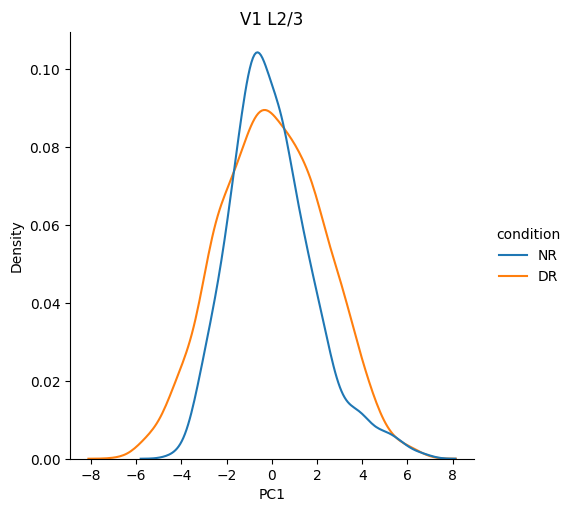

In [64]:
sns.displot(data=V1.obs, x="PC1",hue="condition",kind='kde')
# 使用matplotlib设置标题
plt.title('V1 L2/3')

# 显示图形
plt.show()

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 假设V1.obs中有 "PC1" 和 "condition" 列
data = V1.obs['PC1']
condition_list = V1.obs['condition'].unique()

# 创建一个空字典来保存每个condition的FWHM
fwhm_dict = {}

# 使用sns.displot来绘制KDE图，返回一个FacetGrid对象
g = sns.displot(V1.obs, x="PC1", hue="condition", kind="kde")

# 获取FacetGrid中的Axes对象，使用g.axes[0, 0]来访问第一个子图的Axes对象
axes = g.axes[0, 0]

# 设置偏移量初始值
offset = 0  # 偏移量（百分比）

# 计算每个condition的FWHM并添加到图中
for condition in condition_list:
    condition_data = V1.obs[V1.obs['condition'] == condition]['PC1']
    
    # 使用scipy的gaussian_kde计算KDE
    kde = gaussian_kde(condition_data, bw_method='silverman')  # 可以选择合适的带宽方法
    x = np.linspace(min(condition_data), max(condition_data), 1000)
    y = kde(x)
    
    # 找到最大值和半最大值
    max_value = np.max(y)
    half_max = max_value / 2
    
    # 找到半最大值的左右位置（即FWHM的边界）
    fwhm_indices = np.where(y >= half_max)[0]
    fwhm_left = x[fwhm_indices[0]]
    fwhm_right = x[fwhm_indices[-1]]
    
    # 计算FWHM
    fwhm = fwhm_right - fwhm_left
    
    # 将计算出的FWHM存入字典
    fwhm_dict[condition] = fwhm
    
    # 在图中添加FWHM标注
    axes.axvline(fwhm_left, color='gray', linestyle='--', linewidth=1)
    axes.axvline(fwhm_right, color='gray', linestyle='--', linewidth=1)
    
    # 获取y轴的范围
    ymin, ymax = axes.get_ylim()
    
    # 动态调整文本的纵坐标
    text_y_position = ymax * 0.9 - offset
    offset += 0.02  # 每次增加偏移量，避免重叠
    
    # 将文本的纵坐标设置为y轴的适当位置
    axes.text((fwhm_left + fwhm_right) / 2, text_y_position, f"FWHM: {fwhm:.2f}", 
              horizontalalignment='center', color='black')

# 将计算出的FWHM值赋值到V1.obs['FWHM']中
V1.obs['FWHM'] = V1.obs['condition'].map(fwhm_dict)

# 添加标题和标签
g.fig.suptitle('V1 L2/3', fontsize=16)
g.set_axis_labels('PC1', 'Density')
#plt.show()

# 显示保存了FWHM的DataFrame前几行（可选）
print(V1.obs[['condition', 'FWHM']].head())
output_path = "F:/spatial/V1_integration/NR_V/figures/V1_l23_FWHM.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

      condition      FWHM
74897        NR  3.857446
74901        NR  3.857446
74931        NR  3.857446
74935        NR  3.857446
74941        NR  3.857446
PDF saved as F:/spatial/V1_integration/NR_V/figures/V1_l23_FWHM.pdf


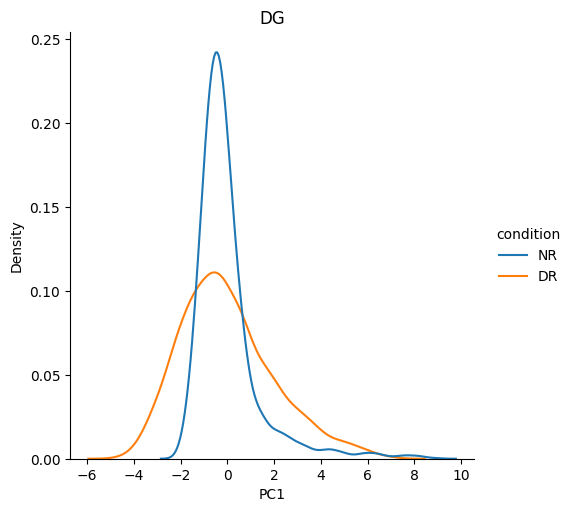

In [65]:
sns.displot(data=DG.obs, x="PC1",hue="condition",kind='kde')
# 使用matplotlib设置标题
plt.title('DG')

# 显示图形
plt.show()

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 假设DG.obs中有 "PC1" 和 "condition" 列
data = DG.obs['PC1']
condition_list = DG.obs['condition'].unique()

# 创建一个空字典来保存每个condition的FWHM
fwhm_dict = {}

# 使用sns.displot来绘制KDE图，返回一个FacetGrid对象
g = sns.displot(DG.obs, x="PC1", hue="condition", kind="kde")

# 获取FacetGrid中的Axes对象，使用g.axes[0, 0]来访问第一个子图的Axes对象
axes = g.axes[0, 0]

# 设置偏移量初始值
offset = 0  # 偏移量（百分比）

# 计算每个condition的FWHM并添加到图中
for condition in condition_list:
    condition_data = DG.obs[DG.obs['condition'] == condition]['PC1']
    
    # 使用scipy的gaussian_kde计算KDE
    kde = gaussian_kde(condition_data, bw_method='silverman')  # 可以选择合适的带宽方法
    x = np.linspace(min(condition_data), max(condition_data), 1000)
    y = kde(x)
    
    # 找到最大值和半最大值
    max_value = np.max(y)
    half_max = max_value / 2
    
    # 找到半最大值的左右位置（即FWHM的边界）
    fwhm_indices = np.where(y >= half_max)[0]
    fwhm_left = x[fwhm_indices[0]]
    fwhm_right = x[fwhm_indices[-1]]
    
    # 计算FWHM
    fwhm = fwhm_right - fwhm_left
    
    # 将计算出的FWHM存入字典
    fwhm_dict[condition] = fwhm
    
    # 在图中添加FWHM标注
    axes.axvline(fwhm_left, color='gray', linestyle='--', linewidth=1)
    axes.axvline(fwhm_right, color='gray', linestyle='--', linewidth=1)
    
    # 获取y轴的范围
    ymin, ymax = axes.get_ylim()
    
    # 动态调整文本的纵坐标
    text_y_position = ymax * 0.9 - offset
    offset += 0.15  # 每次增加偏移量，避免重叠
    
    # 将文本的纵坐标设置为y轴的适当位置
    axes.text((fwhm_left + fwhm_right) / 2, text_y_position, f"FWHM: {fwhm:.2f}", 
              horizontalalignment='center', color='black')

# 将计算出的FWHM值赋值到DG.obs['FWHM']中
DG.obs['FWHM'] = DG.obs['condition'].map(fwhm_dict)

# 添加标题和标签
g.fig.suptitle('DG L2/3', fontsize=16)
g.set_axis_labels('PC1', 'Density')
#plt.show()

# 显示保存了FWHM的DataFrame前几行（可选）
print(DG.obs[['condition', 'FWHM']].head())
output_path = "F:/spatial/V1_integration/NR_V/figures/DG_FWHM.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

      condition     FWHM
81822        NR  1.66355
81823        NR  1.66355
81824        NR  1.66355
81826        NR  1.66355
81828        NR  1.66355
PDF saved as F:/spatial/V1_integration/NR_V/figures/DG_FWHM.pdf


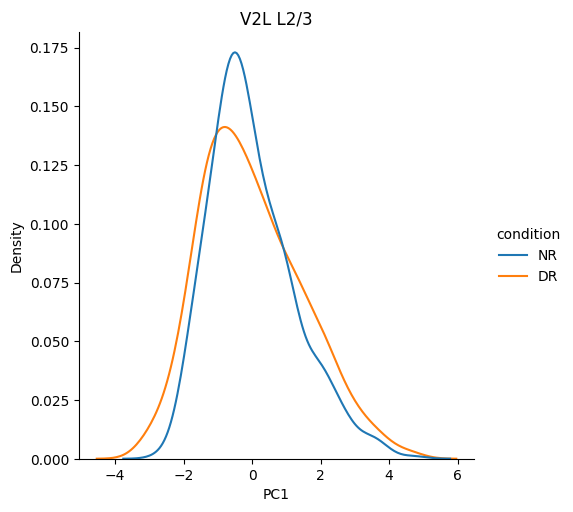

In [66]:
sns.displot(data=V2L_l23.obs, x="PC1",hue="condition",kind='kde')
# 使用matplotlib设置标题
plt.title('V2L L2/3')

# 显示图形
plt.show()

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 假设V2L_l23.obs中有 "PC1" 和 "condition" 列
data = V2L_l23.obs['PC1']
condition_list = V2L_l23.obs['condition'].unique()

# 创建一个空字典来保存每个condition的FWHM
fwhm_dict = {}

# 使用sns.displot来绘制KDE图，返回一个FacetGrid对象
g = sns.displot(V2L_l23.obs, x="PC1", hue="condition", kind="kde")

# 获取FacetGrid中的Axes对象，使用g.axes[0, 0]来访问第一个子图的Axes对象
axes = g.axes[0, 0]

# 设置偏移量初始值
offset = 0  # 偏移量（百分比）

# 计算每个condition的FWHM并添加到图中
for condition in condition_list:
    condition_data = V2L_l23.obs[V2L_l23.obs['condition'] == condition]['PC1']
    
    # 使用scipy的gaussian_kde计算KDE
    kde = gaussian_kde(condition_data, bw_method='silverman')  # 可以选择合适的带宽方法
    x = np.linspace(min(condition_data), max(condition_data), 1000)
    y = kde(x)
    
    # 找到最大值和半最大值
    max_value = np.max(y)
    half_max = max_value / 2
    
    # 找到半最大值的左右位置（即FWHM的边界）
    fwhm_indices = np.where(y >= half_max)[0]
    fwhm_left = x[fwhm_indices[0]]
    fwhm_right = x[fwhm_indices[-1]]
    
    # 计算FWHM
    fwhm = fwhm_right - fwhm_left
    
    # 将计算出的FWHM存入字典
    fwhm_dict[condition] = fwhm
    
    # 在图中添加FWHM标注
    axes.axvline(fwhm_left, color='gray', linestyle='--', linewidth=1)
    axes.axvline(fwhm_right, color='gray', linestyle='--', linewidth=1)
    
    # 获取y轴的范围
    ymin, ymax = axes.get_ylim()
    
    # 动态调整文本的纵坐标
    text_y_position = ymax * 0.9 - offset
    offset += 0.02  # 每次增加偏移量，避免重叠
    
    # 将文本的纵坐标设置为y轴的适当位置
    axes.text((fwhm_left + fwhm_right) / 2, text_y_position, f"FWHM: {fwhm:.2f}", 
              horizontalalignment='center', color='black')

# 将计算出的FWHM值赋值到V2L_l23.obs['FWHM']中
V2L_l23.obs['FWHM'] = V2L_l23.obs['condition'].map(fwhm_dict)

# 添加标题和标签
g.fig.suptitle('V2L L2/3', fontsize=16)
g.set_axis_labels('PC1', 'Density')
#plt.show()

# 显示保存了FWHM的DataFrame前几行（可选）
print(V2L_l23.obs[['condition', 'FWHM']].head())
output_path = "F:/spatial/V1_integration/NR_V/figures/V2L_l23_FWHM.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

       condition     FWHM
100335        NR  2.52872
100344        NR  2.52872
100345        NR  2.52872
100378        NR  2.52872
100391        NR  2.52872
PDF saved as F:/spatial/V1_integration/NR_V/figures/V2L_l23_FWHM.pdf


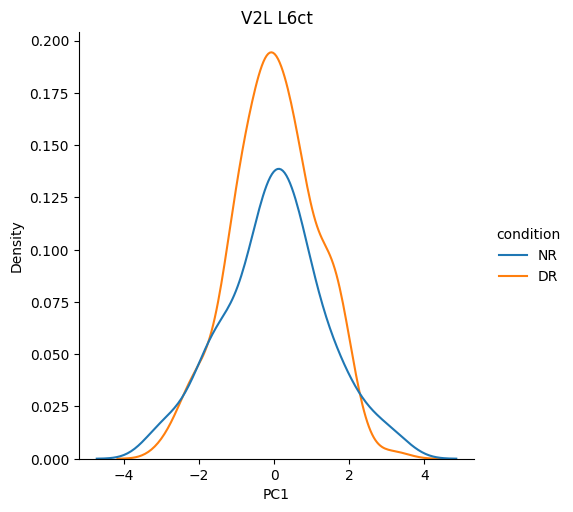

In [67]:
sns.displot(data=V2L_l6ct.obs, x="PC1",hue="condition",kind='kde')
# 使用matplotlib设置标题
plt.title('V2L L6ct')

# 显示图形
plt.show()

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 假设V2L_l6ct.obs中有 "PC1" 和 "condition" 列
data = V2L_l6ct.obs['PC1']
condition_list = V2L_l6ct.obs['condition'].unique()

# 创建一个空字典来保存每个condition的FWHM
fwhm_dict = {}

# 使用sns.displot来绘制KDE图，返回一个FacetGrid对象
g = sns.displot(V2L_l6ct.obs, x="PC1", hue="condition", kind="kde")

# 获取FacetGrid中的Axes对象，使用g.axes[0, 0]来访问第一个子图的Axes对象
axes = g.axes[0, 0]

# 设置偏移量初始值
offset = 0  # 偏移量（百分比）

# 计算每个condition的FWHM并添加到图中
for condition in condition_list:
    condition_data = V2L_l6ct.obs[V2L_l6ct.obs['condition'] == condition]['PC1']
    
    # 使用scipy的gaussian_kde计算KDE
    kde = gaussian_kde(condition_data, bw_method='silverman')  # 可以选择合适的带宽方法
    x = np.linspace(min(condition_data), max(condition_data), 1000)
    y = kde(x)
    
    # 找到最大值和半最大值
    max_value = np.max(y)
    half_max = max_value / 2
    
    # 找到半最大值的左右位置（即FWHM的边界）
    fwhm_indices = np.where(y >= half_max)[0]
    fwhm_left = x[fwhm_indices[0]]
    fwhm_right = x[fwhm_indices[-1]]
    
    # 计算FWHM
    fwhm = fwhm_right - fwhm_left
    
    # 将计算出的FWHM存入字典
    fwhm_dict[condition] = fwhm
    
    # 在图中添加FWHM标注
    axes.axvline(fwhm_left, color='gray', linestyle='--', linewidth=1)
    axes.axvline(fwhm_right, color='gray', linestyle='--', linewidth=1)
    
    # 获取y轴的范围
    ymin, ymax = axes.get_ylim()
    
    # 动态调整文本的纵坐标
    text_y_position = ymax * 0.9 - offset
    offset += 0.05  # 每次增加偏移量，避免重叠
    
    # 将文本的纵坐标设置为y轴的适当位置
    axes.text((fwhm_left + fwhm_right) / 2, text_y_position, f"FWHM: {fwhm:.2f}", 
              horizontalalignment='center', color='black')

# 将计算出的FWHM值赋值到V2L_l6ct.obs['FWHM']中
V2L_l6ct.obs['FWHM'] = V2L_l6ct.obs['condition'].map(fwhm_dict)

# 添加标题和标签
g.fig.suptitle('V2L L6CT', fontsize=16)
g.set_axis_labels('PC1', 'Density')
#plt.show()

# 显示保存了FWHM的DataFrame前几行（可选）
print(V2L_l6ct.obs[['condition', 'FWHM']].head())
output_path = "F:/spatial/V1_integration/NR_V/figures/V2L_l6ct_FWHM.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

      condition      FWHM
96904        NR  2.741406
96908        NR  2.741406
96938        NR  2.741406
96939        NR  2.741406
96944        NR  2.741406
PDF saved as F:/spatial/V1_integration/NR_V/figures/V2L_l6ct_FWHM.pdf


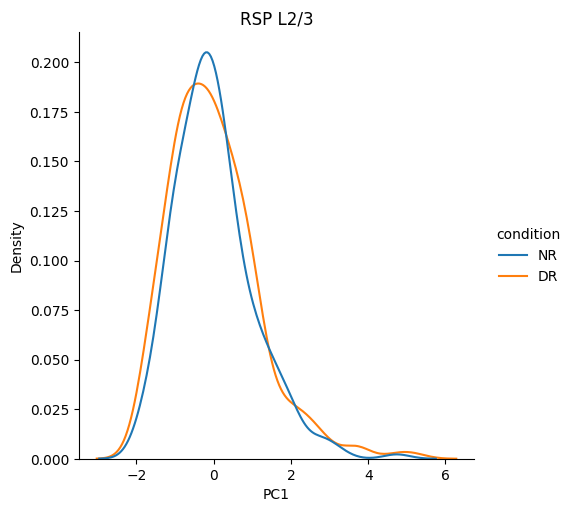

In [68]:
sns.displot(data=RSP.obs, x="PC1",hue="condition",kind='kde')
# 使用matplotlib设置标题
plt.title('RSP L2/3')

# 显示图形
plt.show()

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 假设RSP.obs中有 "PC1" 和 "condition" 列
data = RSP.obs['PC1']
condition_list = RSP.obs['condition'].unique()

# 创建一个空字典来保存每个condition的FWHM
fwhm_dict = {}

# 使用sns.displot来绘制KDE图，返回一个FacetGrid对象
g = sns.displot(RSP.obs, x="PC1", hue="condition", kind="kde")

# 获取FacetGrid中的Axes对象，使用g.axes[0, 0]来访问第一个子图的Axes对象
axes = g.axes[0, 0]

# 设置偏移量初始值
offset = 0  # 偏移量（百分比）

# 计算每个condition的FWHM并添加到图中
for condition in condition_list:
    condition_data = RSP.obs[RSP.obs['condition'] == condition]['PC1']
    
    # 使用scipy的gaussian_kde计算KDE
    kde = gaussian_kde(condition_data, bw_method='silverman')  # 可以选择合适的带宽方法
    x = np.linspace(min(condition_data), max(condition_data), 1000)
    y = kde(x)
    
    # 找到最大值和半最大值
    max_value = np.max(y)
    half_max = max_value / 2
    
    # 找到半最大值的左右位置（即FWHM的边界）
    fwhm_indices = np.where(y >= half_max)[0]
    fwhm_left = x[fwhm_indices[0]]
    fwhm_right = x[fwhm_indices[-1]]
    
    # 计算FWHM
    fwhm = fwhm_right - fwhm_left
    
    # 将计算出的FWHM存入字典
    fwhm_dict[condition] = fwhm
    
    # 在图中添加FWHM标注
    axes.axvline(fwhm_left, color='gray', linestyle='--', linewidth=1)
    axes.axvline(fwhm_right, color='gray', linestyle='--', linewidth=1)
    
    # 获取y轴的范围
    ymin, ymax = axes.get_ylim()
    
    # 动态调整文本的纵坐标
    text_y_position = ymax * 0.9 - offset
    offset += 0.02  # 每次增加偏移量，避免重叠
    
    # 将文本的纵坐标设置为y轴的适当位置
    axes.text((fwhm_left + fwhm_right) / 2, text_y_position, f"FWHM: {fwhm:.2f}", 
              horizontalalignment='center', color='black')

# 将计算出的FWHM值赋值到RSP.obs['FWHM']中
RSP.obs['FWHM'] = RSP.obs['condition'].map(fwhm_dict)

# 添加标题和标签
g.fig.suptitle('RSP L2/3', fontsize=16)
g.set_axis_labels('PC1', 'Density')
#plt.show()

# 显示保存了FWHM的DataFrame前几行（可选）
print(RSP.obs[['condition', 'FWHM']].head())
output_path = "F:/spatial/V1_integration/NR_V/figures/RSP_FWHM.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

      condition      FWHM
49024        NR  2.049958
49038        NR  2.049958
49039        NR  2.049958
49047        NR  2.049958
49048        NR  2.049958
PDF saved as F:/spatial/V1_integration/NR_V/figures/RSP_FWHM.pdf


In [51]:
# 合并所有脑区的数据
data_frames = [
    V1.obs[['condition', 'FWHM']].assign(brain_region='V1 L2/3'),
    DG.obs[['condition', 'FWHM']].assign(brain_region='DG'),
    V2L_l23.obs[['condition', 'FWHM']].assign(brain_region='V2L L2/3'),
    V2L_l6ct.obs[['condition', 'FWHM']].assign(brain_region='V2L L6CT'),
    RSP.obs[['condition', 'FWHM']].assign(brain_region='RSP L2/3')
]

# 合并为一个 DataFrame
df = pd.concat(data_frames, ignore_index=True)

# 只保留每个脑区在 NR 和 DR 下的唯一 FWHM 值
df_unique_fwhm = df.drop_duplicates(subset=['brain_region', 'condition', 'FWHM'])

# 创建一个 figure 和 axes
plt.figure(figsize=(4,4))

# 使用seaborn绘制散点图
sns.scatterplot(data=df_unique_fwhm, x='condition', y='FWHM', hue='brain_region', style='brain_region', s=100)

# 绘制每个脑区 NR 和 DR 之间的连线
for brain_region in df_unique_fwhm['brain_region'].unique():
    # 获取该脑区的 NR 和 DR 数据
    condition_data = df_unique_fwhm[df_unique_fwhm['brain_region'] == brain_region]
    
    # 如果该脑区同时有 NR 和 DR，则绘制连接线
    if len(condition_data) == 2:
        nr_fwhm = condition_data[condition_data['condition'] == 'NR']['FWHM'].values[0]
        dr_fwhm = condition_data[condition_data['condition'] == 'DR']['FWHM'].values[0]
        
        # 获取对应的颜色
        color = sns.color_palette("deep")[list(df_unique_fwhm['brain_region'].unique()).index(brain_region)]
        
        # 绘制连接线
        plt.plot(['NR', 'DR'], [nr_fwhm, dr_fwhm], color=color, linewidth=2)

# 添加标题和标签
plt.title('Scatter Plot of NR/DR vs FWHM by Brain Region', fontsize=16)
plt.xlabel('Condition (NR vs DR)', fontsize=14)
plt.ylabel('FWHM', fontsize=14)

# 显示图形
#plt.show()
output_path = "F:/spatial/V1_integration/NR_V/figures/NR_DR_FWHM.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V1_integration/NR_V/figures/NR_DR_FWHM.pdf
